# Introduction to Deep Learning Course


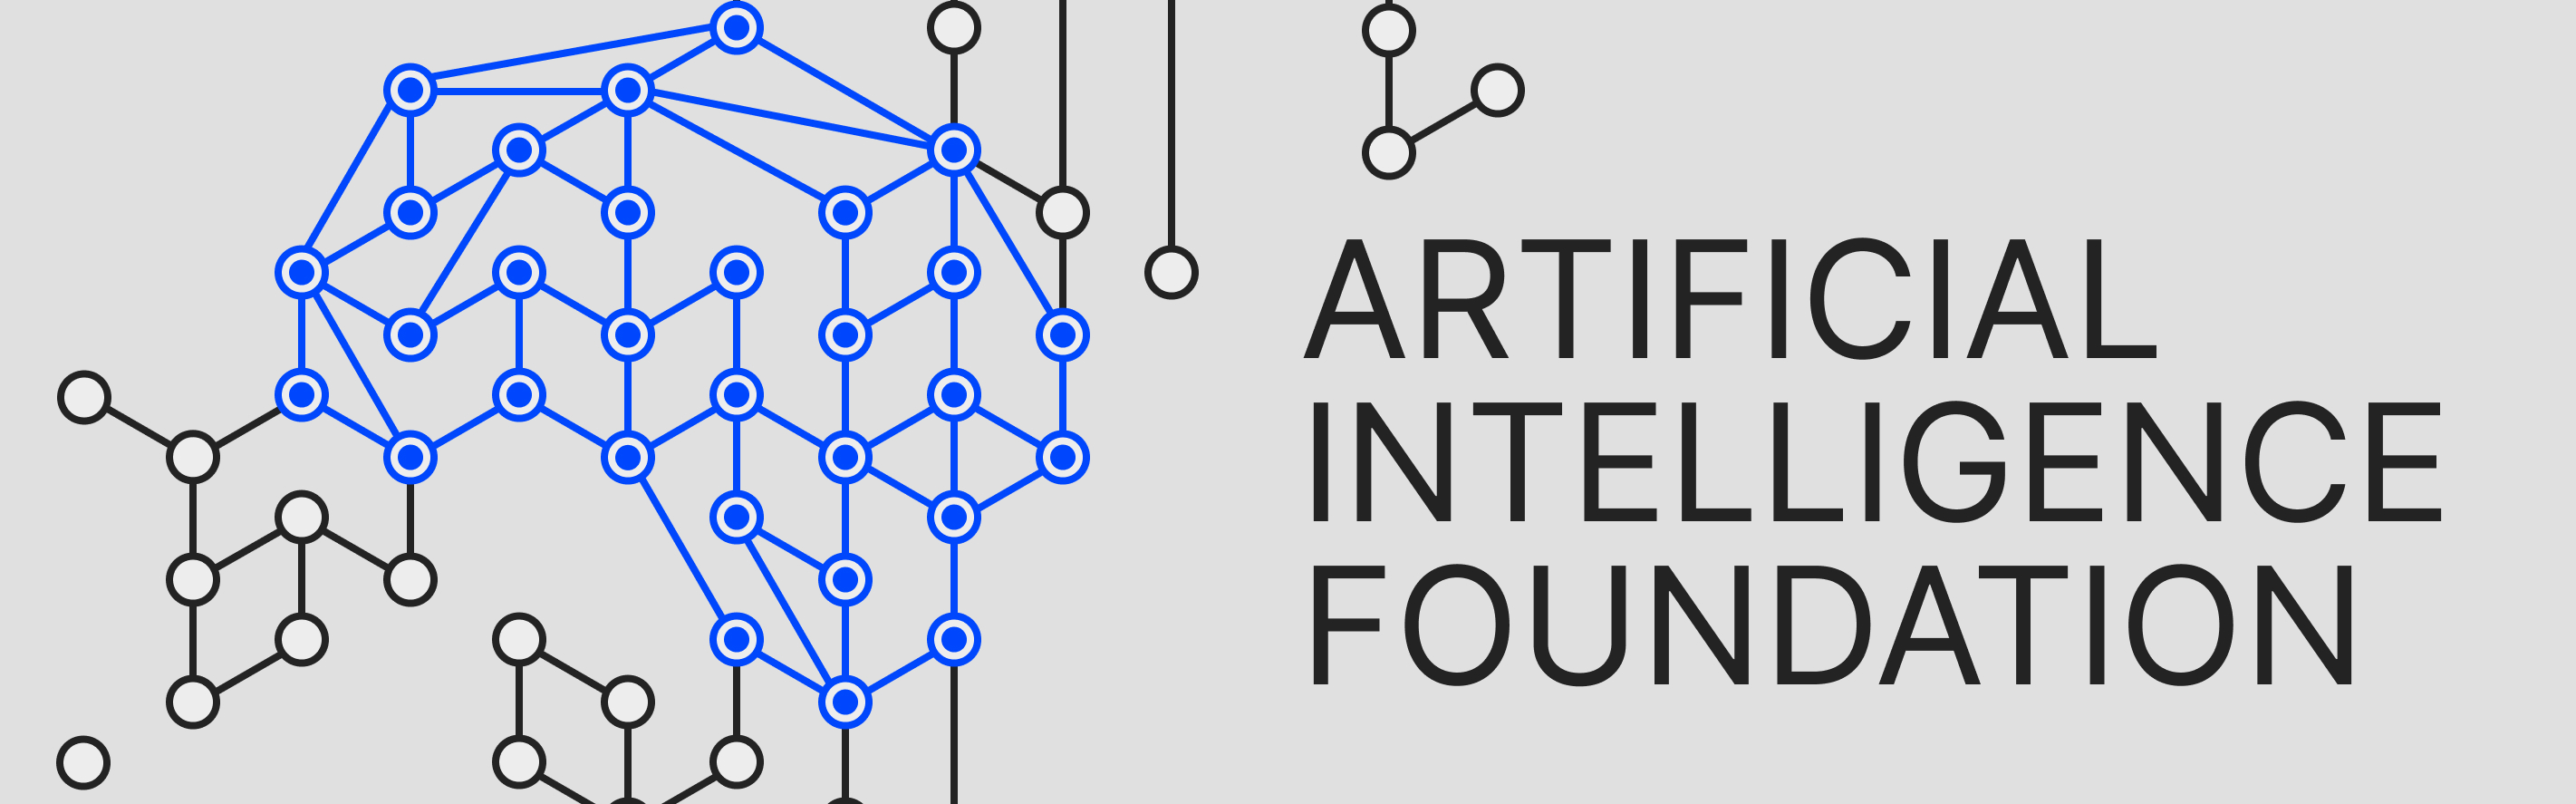

## Lesson 2. PyTorch, Gradient Descent for Training a Neural Network.

##### Author: [Tatiana Gaintseva](https://atmyre.github.io/)

This is the second lesson in the "Introduction to Deep Learning" course. In this lesson we will start working with PyTorch — a most popular framework for working woth neural networks. We will also learn about how neural network are trained. And, finally, we will build and train our first neural network on PyTorch.

Here's the **outline of this class**:

- [Introduction to PyTorch](https://colab.research.google.com/drive/1DuvZ-QTG-vUOswd2NlqQDuhx_q1JVqrQ#scrollTo=ftAAFt2DGM7j)
- [Neural Network in PyTorch](https://colab.research.google.com/drive/1DuvZ-QTG-vUOswd2NlqQDuhx_q1JVqrQ#scrollTo=vQa6nV13rKQy)
    - [Building Blocks of a Neural Network in PyTorch](https://colab.research.google.com/drive/1DuvZ-QTG-vUOswd2NlqQDuhx_q1JVqrQ#scrollTo=KulFKp_e9mUG&line=1&uniqifier=1)
    - [Fully-Connected Neural Network for Approximating the Cosine Function](https://colab.research.google.com/drive/1DuvZ-QTG-vUOswd2NlqQDuhx_q1JVqrQ#scrollTo=x4yNdDS-27rB)
- [How Neural Network is Trained](https://colab.research.google.com/drive/1DuvZ-QTG-vUOswd2NlqQDuhx_q1JVqrQ#scrollTo=QcKhiM4m8Tzx&line=1&uniqifier=1)
    - [Minimisation of a Single-variable Function](https://colab.research.google.com/drive/1DuvZ-QTG-vUOswd2NlqQDuhx_q1JVqrQ#scrollTo=dgbBK0qEHRtg)
    - [Minimisation of a Multivariable Function](https://colab.research.google.com/drive/1DuvZ-QTG-vUOswd2NlqQDuhx_q1JVqrQ#scrollTo=AniHLHhGaBzq)
    - [Training a Neural Network using Gradient Descent](https://colab.research.google.com/drive/1DuvZ-QTG-vUOswd2NlqQDuhx_q1JVqrQ#scrollTo=GzAi3OqT-5eL)
- [Training a Neural Network in PyTorch](https://colab.research.google.com/drive/1DuvZ-QTG-vUOswd2NlqQDuhx_q1JVqrQ#scrollTo=oc45jZzGA39U)
- [Inheritance from the nn.Module class](https://colab.research.google.com/drive/1DuvZ-QTG-vUOswd2NlqQDuhx_q1JVqrQ#scrollTo=u8N2lGGqFS95)
- [Transferring Computations to the Graphics Card](https://colab.research.google.com/drive/1DuvZ-QTG-vUOswd2NlqQDuhx_q1JVqrQ#scrollTo=DUg1ZTnMQd-g)
- [Links to the Additional Materials](https://colab.research.google.com/drive/1DuvZ-QTG-vUOswd2NlqQDuhx_q1JVqrQ#scrollTo=6r5Q68qFISGI)

## Introduction to PyTorch

PyTorch is currently one of the most popular frameworks for deep learning. "Popular" in the sense that nowadays, most of the code related to neural networks is written in PyTorch. This framework has become so popular because it is very convenient to work with PyTorch. As we will see later, working with PyTorch is very similar to working with Numpy. Additionally, PyTorch has very convenient and informative [documentation](https://pytorch.org/docs/stable/index.html) and [tutorials](https://pytorch.org/tutorials/).

A brief excursion into frameworks for deep learning:

- **Caffe, Theano, Lasagne** — are practically no longer used;
- **TensorFlow** — a framework from Google that was popular until 2017-2018 before the emergence of PyTorch. At that time, most of the code related to neural networks was written on it. However, it was quite complex, so PyTorch quickly took the lead.

    TensorFlow also has a "wrapper" called Keras, which allows for simpler interaction with neural networks. However, Keras is less flexible than PyTorch, so it cannot fully replace it.

    Additionally, TensorFlow 2.0 was released in 2019, which greatly simplified working with neural networks. But by that time, the market was already captured by PyTorch, so TensorFlow 2.0 did not become popular.

- **PyTorch**;
- **JAX** — a new framework from Google, designed to replace TensorFlow.

### torch.Tensor

The basic structure of the framework is a structure called `torch.Tensor`. A tensor is analogous to a `numpy.array`, and many methods for working with `torch.Tensor` exactly replicate the methods of `numpy array`.

A tensor is the type of data that all neural networks in PyTorch work with. The weight matrices of the network's layers are tensors. The data that we input into the network must also be converted to the `torch.Tensor` type. And, of course, the network's output will also be of type `torch.Tensor`.

Let's import the library and look at typical ways to create tensors.

In [ ]:
import torch
import warnings
warnings.filterwarnings('ignore')

1. Tensors can be created from lists, arrays, and other Python containers.

In [ ]:
x_list = [1., 2., 3.]
x_tensor = torch.tensor(x_list)
x_tensor

tensor([1., 2., 3.])

2. Tensors can be created using initialization functions, just like in `numpy`.

In [ ]:
zeros_tensor = torch.zeros(2, 3)  # Tensor of zeros of size 2 by 3
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
ones_tensor = torch.ones(2, 3)  # Tensor of ones of size 2 by 3
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
eye_tensor = torch.eye(6)  # Identity matrix of a size 6
eye_tensor

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])

3. In general, almost all methods available for Numpy arrays are also available for torch.Tensor:

In [ ]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

y_tensor = torch.tensor([
    [-10, 3],
    [5, -4]
])

In [ ]:
x_tensor + y_tensor  # Adding tensors x and y

tensor([[-9,  5],
        [ 8,  0]])

In [ ]:
x_tensor @ y_tensor  # Matrix multiplication of tensors x and y

tensor([[  0,  -5],
        [-10,  -7]])

In [ ]:
# equivalent to np.concatenate([x_tensor, y_tensor], axis=1)
torch.cat([x_tensor, y_tensor], dim=0)

tensor([[  1,   2],
        [  3,   4],
        [-10,   3],
        [  5,  -4]])

4. Tensors can be converted back to Numpy format

In [ ]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_numpy = x_tensor.numpy()
x_numpy

array([[1, 2],
       [3, 4]])

#### Task #1:

Let's practice finding and using PyTorch functions. There are such functions in NumPy:
- [numpy.random.randint](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.randint.html) that creates vector of random integer numbers;
- [numpy.cumsum](https://numpy.org/doc/2.1/reference/generated/numpy.cumsum.html) that gives the cumulative sum of the elements along a given axis

Here's a code on NumPy of creating a 2-d vector of random integers between -5 and 5 and finding its cumsum:

In [2]:
import numpy as np

rand_vec = np.random.randint(-5, 5, size=(3, 4))
cumsum_axis_0 = np.cumsum(rand_vec, axis=1)
cumsum_axis_0

array([[ 2,  2,  3, -1],
       [-2,  0,  2,  2],
       [ 2,  3,  2,  4]])

Your task is to implement the same using PyTorch analogs of these functions. Use PyTorch documentation and/or Google Search to find right functions.

In [ ]:
# YOUR CODE HERE

## Neural Network in Pytorch



### Building Blocks of a Neural Network in PyTorch

Let's learn how to create a fully connected neural network in Pytorch.

Neural networks in Pytorch are constructed in a modular way: there is a set of standard blocks from which we can assemble the final model. The simplest of these blocks are linear layers and activation functions. In the following sessions, we will get acquainted with new blocks that can be integrated into the network architecture.

Let's remember how a fully connected neural network is structured.

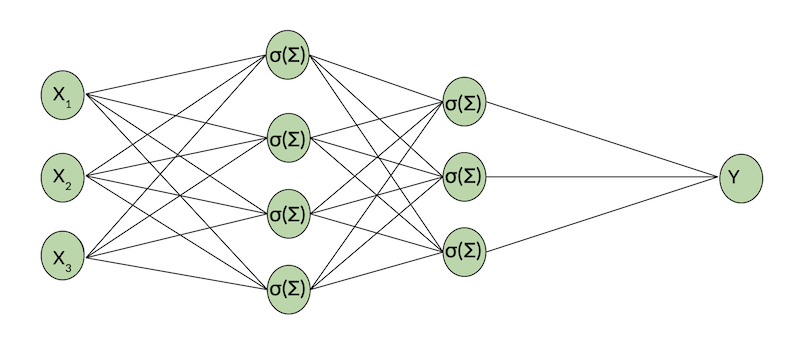

$$\widehat{y} = \sigma(W_3^T \sigma(W_2^T \sigma(W_1^TX + b_1 ) + b_{2}) + b_{3})$$

Each fully connected layer represents a combination of a linear transformation $\widehat{c} = WX + b$ and some activation function $\sigma(\widehat{c})$:
- First, the incoming vector $X$ is multiplied by the matrix $W$, and the bias vector $b$ is added to the result:
    
    $$\widehat{c} = WX + b$$
- Then, the obtained result is passed through the activation function. The result is fed as the input vector to the next layer of the network.
    $$\sigma(\widehat{c})$$

A neural network is defined as a list of such transformations that follow one after the other.

Let's learn how to define a linear transformation and an activation function. Then we will combine them to create a fully connected neural network.

A layer that represents a linear transformation is defined using the class `torch.nn.Linear`. Let's create a layer with 5 input neurons and 3 output neurons.

In [ ]:
import torch.nn as nn

n = 5
m = 3
linear_layer = nn.Linear(n, m)

In [ ]:
linear_layer

Linear(in_features=5, out_features=3, bias=True)

Next is the activation function. Many well-known activation functions are implemented in the `nn` module and are duplicated in the `nn.functional` module. Let's choose one of them, for example, the hyperbolic tangent (tanh).

In [ ]:
import torch.nn.functional as F

# You can use this option
# activation = F.tanh
# or the more correct option:
activation = nn.Tanh()

In [ ]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])
activation(x_tensor)

tensor([[0.7616, 0.9640],
        [0.9951, 0.9993]])

**Note:** The second way of declaring the activation function (using the nn module) is more preferable, as using functions directly from `torch.nn.functional` can sometimes lead to improper functioning. This might be the case, for example, if activation function has trainable parameters and/or different behaviour on training and testing phases. It is safer and more correct to use classes from `torch.nn`, however, it is very common to encounter the use of objects from `torch.nn.functional` on various resources dedicated to `Pytorch`, so we find it necessary to discuss this method of using activation functions as well.

Now, the pass of some tensor with data through such a fully connected layer will be defined using a sequence of commands:

In [ ]:
random_input = torch.rand(5)

z = linear_layer(random_input)
output = activation(z)
output

tensor([-0.4108,  0.0975,  0.6236], grad_fn=<TanhBackward0>)

Let's pay attention to `grad_fn=<TanhBackward0>`. Such an annotation will appear on all tensors that are trainable parameters in the neural network. This means that for this tensor, a gradient will be computed during the training process of the network, which will be used to update the values of the tensor. We will talk more about the training process of the network later in this lesson.

Let's now build a neural network from Linear and Tanh blocks. The simplest way to combine multiple modules into a sequence is to use the `nn.Sequential` module. This class allows us to combine several modules into one container so that when applying this container to a certain tensor, the computations will be performed in the order in which we passed the elements. That is, this way we can obtain a neural network with sequential Linear and Tanh layers.

In [ ]:
FF_layer = nn.Sequential(
    linear_layer,
    activation
)
FF_layer(random_input)

tensor([-0.4108,  0.0975,  0.6236], grad_fn=<TanhBackward0>)

We obtained exactly the same result as in the cell above. 

#### Task #2

We used Tanh activation function in our example above. As we know, there are other activation functions, e.g. Sigmoid and ReLU (and many more!).Your task is to replace Tanh with Sigmoid and ReLU and see how output changes.

Here's a PyTorch documentation on these activation functions:
- [Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)
- [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)

In [ ]:
FF_layer = nn.Sequential(
    linear_layer,
    # YOUR CODE HERE — apply Sigmoid or ReLU here
)
FF_layer(random_input)

Now let's build a fully connected neural network in the same way to solve some simple task. For example, let's try to model the cosine function.

### Fully Connected Neural Network for Approximating the Cosine Function

First, let's set a one-dimensional dataset.

In [ ]:
X = torch.normal(mean=torch.zeros((1000, 1)), std= 2)  # Generate random numbers with a mean of zero and a standard deviation of 2
Y = torch.cos(X)  # Calculate the cosine of X

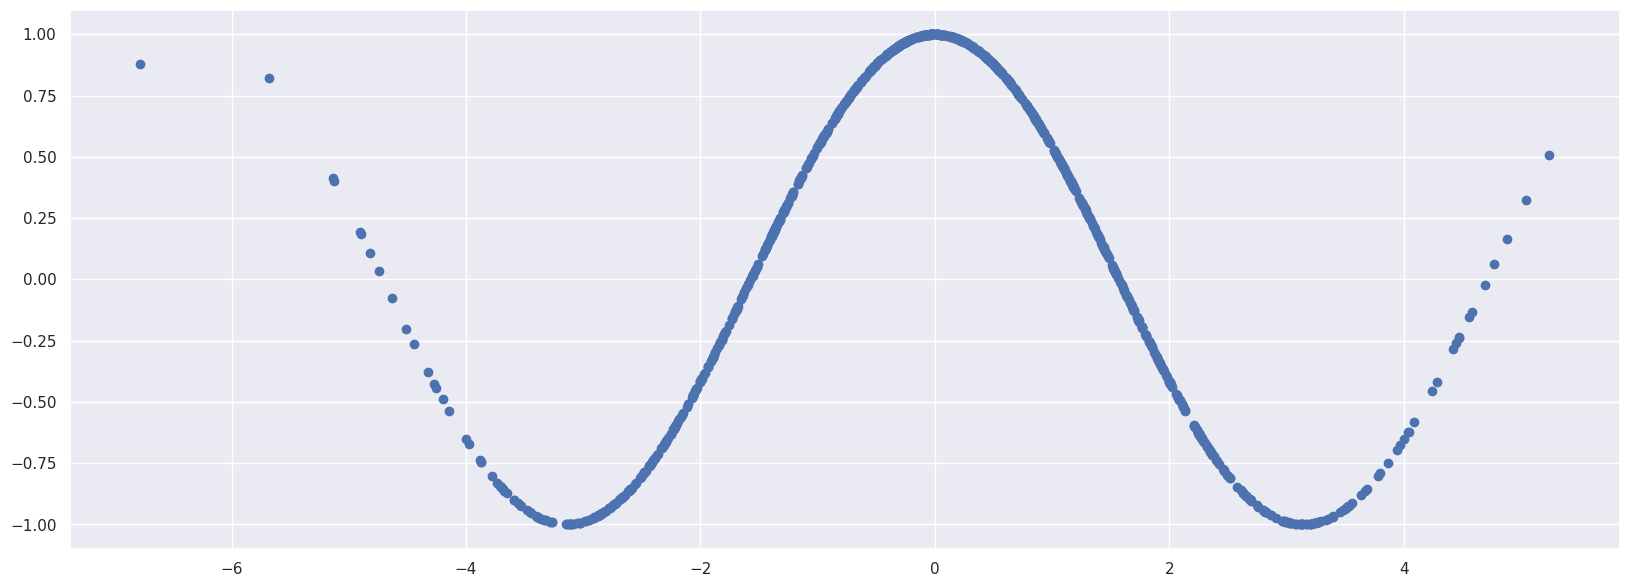

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(20,7))
plt.scatter(x=X, y=Y);  # Create a scatter plot for X and Y

Let's define a neural network with three layers. Let there be five neurons in the hidden layers. We will choose the hyperbolic tangent as the activation function, as in the examples above.

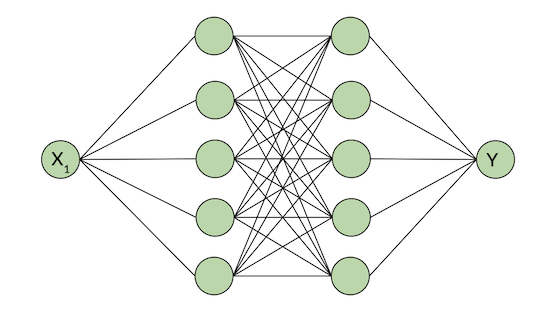

In [ ]:
import torch.nn as nn
NN = nn.Sequential(nn.Linear(1, 5, bias=True),
                   nn.Tanh(),
                   nn.Linear(5, 5, bias=True),
                   nn.Tanh(),
                   nn.Linear(5, 1, bias=True),
                   nn.Tanh())  # Neural network with three layers and five neurons in the hidden layers, using the hyperbolic tangent activation function

Let's see what our untrained neural network can do:

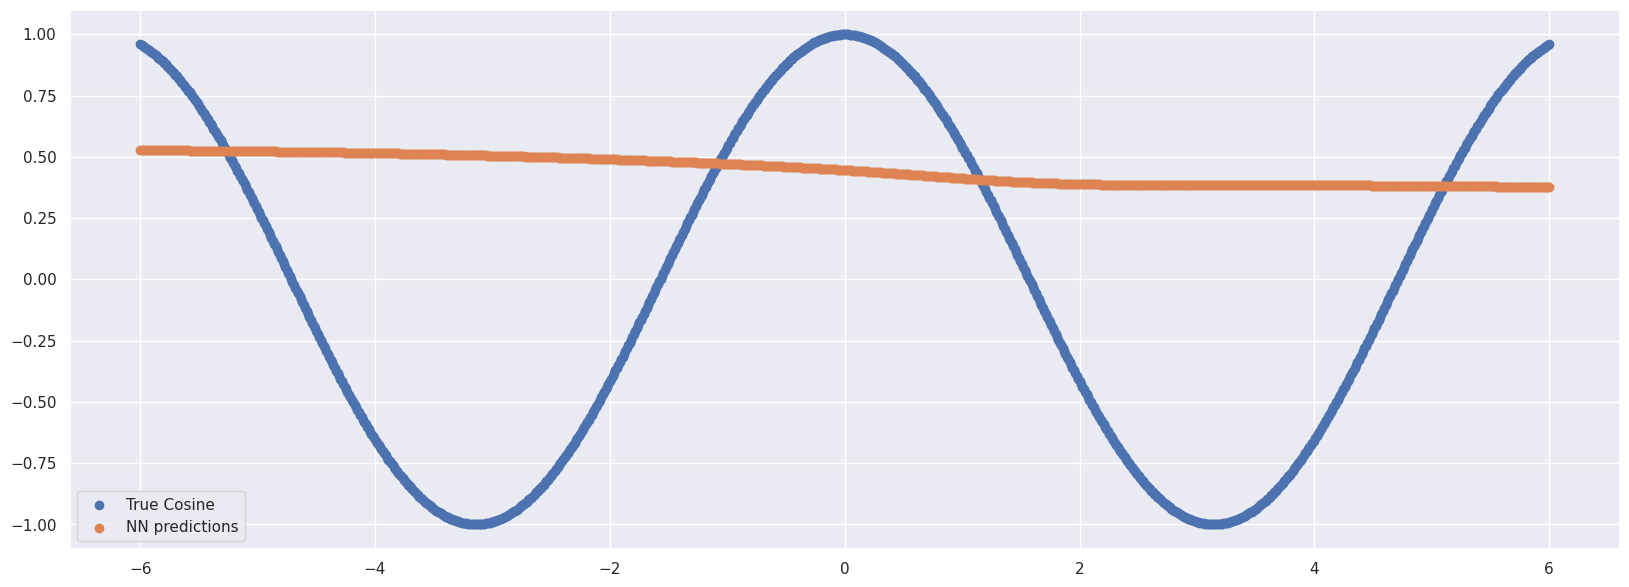

In [ ]:
X_test = torch.linspace(-6, 6, 1000)
Y_test = torch.cos(X_test)

nn_prediction = NN(X_test.view(-1, 1))
nn_prediction = nn_prediction.detach().numpy()

plt.figure(figsize=(20,7))
plt.scatter(x=X_test, y=Y_test, label='True cosine');
plt.scatter(x=X_test, y=nn_prediction, label='NN predictions');
plt.legend()

The result obtained is expected since our neural network is not trained. Let's train it. But first, let's talk about how this can be done in general.

**Note 1:** In line 4 of the previous cell, we used the `.view()` function. `.view()` is an alternative to the `.reshape()` function, allowing you to change the dimensions of a tensor without altering the data within it. Here, we applied it to transform a vector of input data of length $n$ into a matrix of size $(n, 1)$. This formality is necessary for the correct passage of the tensor through our transformations. The thing is, neural networks (and any other machine learning models) accept input data in the form of a matrix of size $(n, k)$, where $n$ is the number of data elements, and $k$ is the number of features for each data element. In our case, each element has 1 feature (its coordinate along the X-axis). And we are effectively creating a matrix of elements-features, where there are $n$ elements, and each element has 1 feature.

**Note 2:** In line 5, we performed a combination of tensor methods `.detach().numpy()`. The `.detach()` function is needed to extract the tensor from the neural network's computation graph. Roughly speaking, the output of the neural network is still part of the network's computation graph, and to convert this tensor to numpy, it must first be detached from the network's graph.

#### Question #1

The task of approximating cosine function is technically a regression problem. We've discussed previously that for the regression task, we should not have activation function after the last layer of the network. But in our example we put Tanh activation function to the end. Why is that a valid option here in our task?

#### Hint
Look at our task. What can we say about a range of values of a target variable?

#### Answer
In our case, we solve the task of approximating cosine function. Range of values of cosine function is bounded between [-1, 1]. And so is a range of values of Tanh activation function! So applying Tanh at the end of our network, we restrict network ourputs be inside [-1, 1], which can actually be beneficial for training.

Here we can say that we have incorporated an inductive bias into our network, i.e. we have made decisions about a design of our network based on our knowledge of the data, that is, that target values are bounded in [-1, 1]. This is a valid thing to do, and you will see further how ideas about the nature of the problem or data helps people design model architectures for specific tasks. 

Actually, the whole process of designing neural network architectures can be seen as a process of designing and incorporating suitable inductive biases. You can read more about what inductive bias is [in this longread](https://atmyre.github.io/blog/2024/ind_bias/). 

## How Neural Network is Trained

Neural networks are trained using the gradient optimization algorithm. The idea of such algorithms is based on the sequential computation of gradients (partial derivatives) of the loss function with respect to the weights of the network and updating the weights of the network.

Now we will sequentially discuss the idea of the gradient optimization algorithm.

Let's first remember that our goal when training a neural network is to select the hyperparameters of the network such that the average value of the chosen loss function is minimized on average on the training dataset.

For example, let's take the dataset from the last lesson:

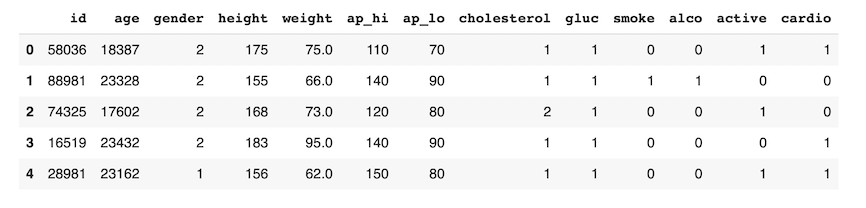

Let us choose the loss function $loss$ that we want to minimize on our data.

Then the task of training the network is to find such network parameters $W_1, b_1, W_2, b_2, \dots$, that the average value of the loss function on the elements of the training dataset is minimized: $$L = \frac{\sum_{i=1}^n loss(y_i, \widehat{y}_i)}{n} \to min$$

, where $n$ is the number of elements in the data, $y_i$ is the true value of the target variable for the $i$-th data element,  $\widehat{y}_i$ is the model's response for the $i$-th data element.

Let's take another look at the neural network and understand that its formula can be viewed as a function of its parameters ($W_i$ and $b_i$)

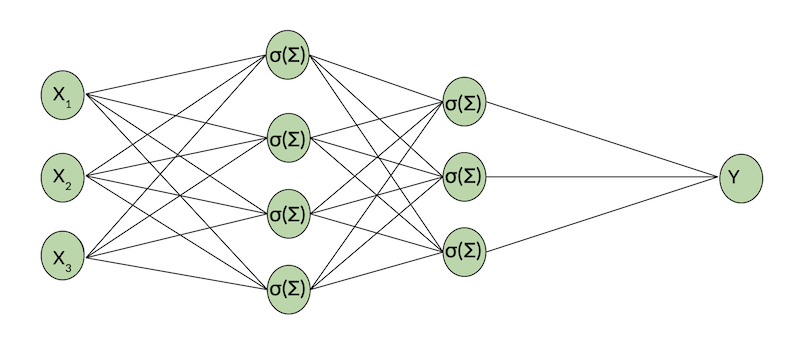

$$\widehat{y} = \sigma(W_3^T \sigma(W_2^T \sigma(W_1^TX + b_1 ) + b_{2}) + b_{3})$$

Substituting this formula for $\widehat{y}$ into the $loss$ formula, we get:

$$L = \frac{\sum_{i=1}^n loss(y_i, \sigma(W_3 \sigma(W_3^T \sigma(W_1^TX_i + b_1 ) + b_{2}) + b_{3}))}{n} \to min$$

It turns out that $L$ is a function of the network parameters $W_i$ and $b_i$. When training the network, the task is to minimize a multi-variable function, i.e., the task of finding such values of $W_1, b_1, W_2, b_2, W_3, b_3$ that the value of $L$ for them is minimal.

**How can we solve the problem of minimizing a function?** Now we will talk about this and get acquainted with the idea of the gradient optimization algorithm (gradient descent).

To begin with, we will discuss methods for solving the problem of minimizing a function and the gradient descent algorithm for a single-variable function. Then we will generalize it for functions of many variables. This will lead us to the algorithm for training a neural network.

If you are already familiar with the idea of gradient descent algorithm, you can skip next two sections and jump to "[Training a Neural Network using Gradient Descent](https://colab.research.google.com/drive/1DuvZ-QTG-vUOswd2NlqQDuhx_q1JVqrQ#scrollTo=GzAi3OqT-5eL)" part.

### Minimization of a Single-variable Function

Here we will talk about methods for solving the problem of minimizing a single-variable function.

The first method is analytical. For many functions, the minimum point can be found by setting the derivative to zero.

$$y = x^3 - 3x - 4$$
$$\frac{dy}{dx} = 3x^2-3$$
$$x_{min} = \{-1, 1\}$$

However, this method does not work for all functions, even those of a single variable. Not to mention functions of many variables.

$$y = x^{10} - 3x^7 - 4x^3 + 4x$$
$$\frac{dy}{dx} = 10x^9-21x^6 -12x^2 + 4$$
$$x_{min} = \ ?$$

Here we are helped by two properties of the partial derivative. For a function of one variable, these properties can be formulated as follows:

1. The sign of the derivative at a point indicates whether the function is increasing or decreasing at that point;
2. The absolute value of the derivative indicates the rate of increase/decrease of the function at that point. The higher the absolute value of f’(x), the greater the rate of decrease/increase of the function f at point x.

Let's illustrate these properties. Consider the function of one variable $$f(x) = x^4 + 5x^3 - 10x$$

Its derivative:
$$\frac{df}{dx} = 4x^3 + 15x^2 - 10$$

Let's calculate the value of the derivative at the points -5, -3.55, -2:

$$\frac{df}{dx}(-5) = -135$$
$$\frac{df}{dx}(-3.55) = ~0$$
$$\frac{df}{dx}(-2) = 18$$

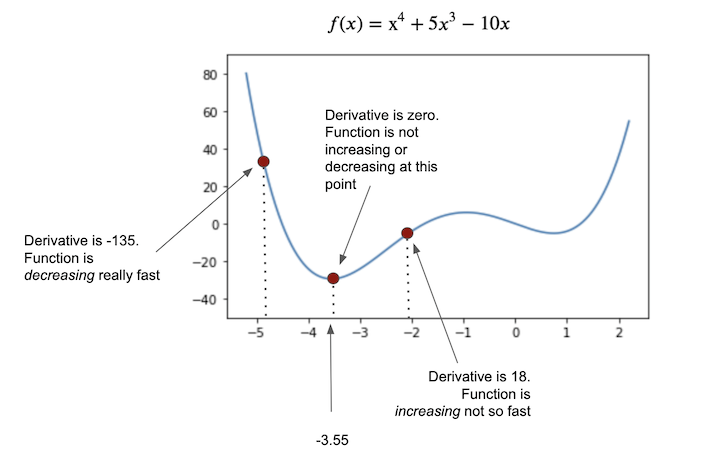

It turns out that **by calculating the derivative of the function at the point $x$, we know in which direction to move from the point $x$ to decrease the value of the function**.

We can use this property to find the minimum of the function. The idea is as follows: let's choose a random point, for example, $x=5$. We will calculate the value of the derivative of the function at this point. By the sign of the derivative, we will understand which direction to move to reach the minimum point. And we will move there.

However, there is a problem: we know which direction the minimum point lies, but we do not know how far it is. That is, we do not know how much we need to move from the current point to reach the minimum point.

One could try to do this: fix the step size, say, $\delta x = 1$. Select a random point, for example, $x=5$. Calculate the value of the derivative of the function at this point. By the sign of the derivative, understand which direction to move to reach the minimum point. Move in that direction by the step size $\delta x$. At the new point, again calculate the value of the derivative of the function. Again understand where to move now to reach the minimum point. Move there by $\delta x$. And so on.

But this idea is quite inefficient. There are at least two reasons for this:
1. Sometimes the initial point is so far from the minimum point that to reach the minimum point, a very large number of steps will have to be taken;
2. Sometimes the initial point (or the point we reached during the algorithm) is so close to the minimum point that with a step size of $\delta x = 1$, we will "jump over" the minimum point.

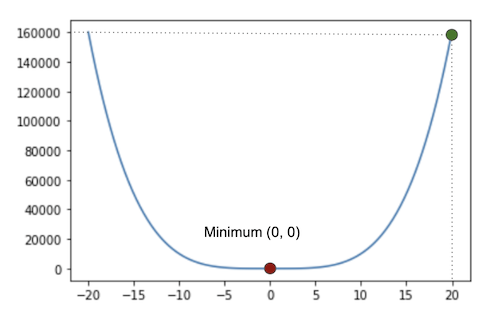

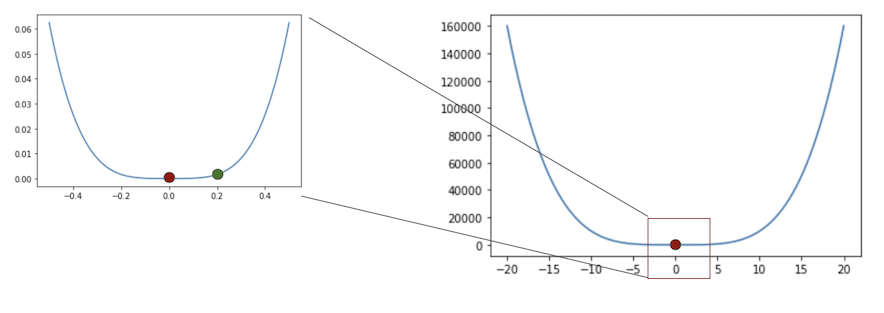

Here, the second mentioned property of the derivative helps us: that the absolute value of the derivative indicates the rate of growth/decline of the function at a point. The idea is then as follows: let's move not by $\delta x = 1$, but by $\delta x = \alpha*\frac{df}{dx}$. Then we will take larger steps when we are far from the minimum point, and smaller steps when we are close to the minimum point.

Then **the gradient descent algorithm for a function of one variable** will look like this:

1. Choose a random starting point $x$. Choose the gradient descent step value $\alpha$
2. While the stopping criterion is not met, do the following:
    - calculate the value of $f(x)$ for the current point $x$;
    - calculate the values of the derivative $\frac{d f}{d x}$;
    - move to the new point:
    $$x = x - \alpha \frac{df}{dx}$$

The stopping criterion can vary. For example, if the value of the derivative at the current point (and, accordingly, the gradient descent step) has become very small.

### Minimisation of Multivariable Functions

For a function of two or more variables, the partial derivatives with respect to each of the variables have the same properties:

1. The sign of the partial derivative with respect to the variable $x_1$ at a point indicates whether the function is increasing or decreasing at that point *with respect to the variable $x_1$*;
2. The absolute value of the partial derivative with respect to the variable $x_1$ indicates the rate of growth/decline of the function at a point *with respect to the variable $x_1$*. The higher the absolute value of $f’_{x_1}(x)$, the higher the rate of decline/increase of the function f *with respect to the variable $x_1$* at the point x.

For example, consider the function of two variables $$f(x_1, x_2) = 3x_1^2 + 2x_1x_2$$

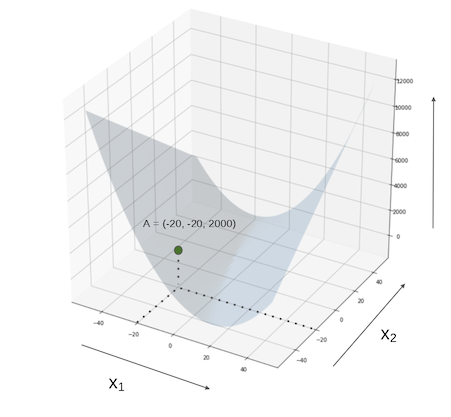

Her partial derivative with respect to $x_1$:
$$\frac{df}{dx_1} = 6x_1 + 2x_2$$
And its value at the point x = (-20, -20):
$$\frac{df}{dx_1}(-20, -20) = 6 \cdot (-20) + 2\cdot (-20) = -160$$

It follows that by calculating the partial derivative of the function at point $x$ with respect to the variable $x_1$, we know in which direction to move away from point $x$ along the variable $x_1$ in order to decrease the value of the function.

Then the **gradient descent algorithm for a function of many variables** will look like this:

1. Choose a random starting point $x = (x_1, x_2, ..., x_n)$. Choose the gradient descent step size $\alpha$.
2. While the stopping criterion is not met, do the following:
    - calculate the function value at the current point $f(x)$
    - calculate the derivative value $\frac{d f}{d x_i}(x)$;
    - move to the new point:
    $$x_i = x_i - \alpha \frac{df}{dx_i}(x)$$

The algorithm is called gradient descent because the vector of partial derivatives of the function $\nabla f = (\frac{df}{dx_1}, \frac{df}{dx_2}, ..., \frac{df}{dx_n})$ is called the gradient of function f. And in step number two, the gradient is updated:
$$x = x - \alpha \nabla f$$

### Training a Neural Network using Gradient Descent

Let's take another look at the neural network formula. We have already understood that the loss formula for a neural network can be viewed as a function of many variables of the network's weights.

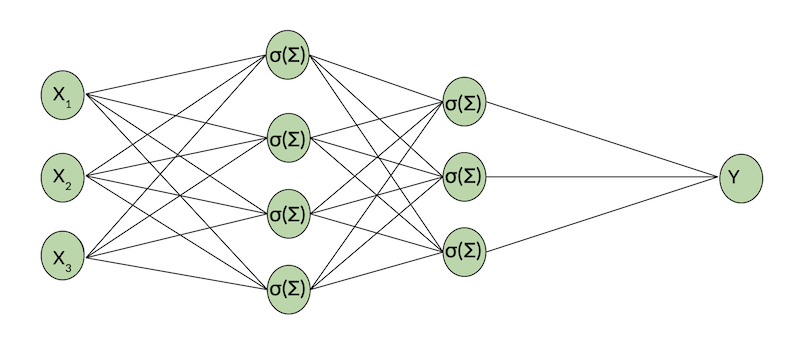

$$\widehat{y} = \sigma(W_3^T \sigma(W_2^T \sigma(W_1^TX + b_1 ) + b_{2}) + b_{3})$$

$$L = \frac{\sum_{i=1}^n loss(y_i, \sigma(W_3 \sigma(W_3^T \sigma(W_1^TX_i + b_1 ) + b_{2}) + b_{3}))}{n} \to min$$

Then **the gradient optimization algorithm for a neural network** looks like this:

1. Initialize all network weights $W_i$ and $b_i$ with random values. Choose the gradient descent step value $\alpha$.
2. Until the stopping criterion is met, do the following:
    - calculate the $L$ value with the current values of parameters $W_i$ and $b_i$;
    - calculate the values of partial derivatives $\frac{\partial L}{\partial W_i}$, $\frac{\partial L}{\partial b_i}$;
    - update the values of network parameters:
    $$W_i = W_i - \alpha \frac{\partial L}{\partial W_i}, \ \ b_i = b_i - \alpha \frac{\partial L}{\partial b_i}$$

Note here that the derivatives $\frac{\partial L}{\partial W_i}$, $\frac{\partial L}{\partial b_i}$ are matrix derivatives, because $W_i$ and $b_i$ are matrices. But matrix derivatives and their calculations are not fundamentaly different from standard scalar derivatives. If $W_k$ is a matrix of shape $n \times m$ with elements $w_{k}^{ij}, 1 \leqslant i \leqslant n, 1 \leqslant j \leqslant m$, then $\frac{\partial L}{\partial W_i}$ is a matrix of the same size $n \times m$ with elements $\frac{\partial\ L}{\partial w_{k}^{ij}}$:

$$\frac{\partial\ L}{\partial W_i} = 
\begin{pmatrix}
\frac{\partial L}{\partial w_i^{11}} & \frac{\partial L}{\partial w_i^{12}} & \dots & \frac{\partial L}{\partial w_i^{1l}}\\
\frac{\partial L}{\partial w_i^{21}} & \frac{\partial L}{\partial w_i^{22}} & \dots & \frac{\partial L}{\partial w_i^{2l}} \\ 
\dots & \dots & \dots & \dots\\
\frac{\partial L}{\partial w_i^{m1}} & \frac{\partial L}{\partial w_i^{m2}} & \dots & \frac{\partial L}{\partial w_i^{ml}} \\ 
\end{pmatrix}$$

The same for $b_i$:

$$\frac{\partial L}{\partial b_i} = 
\begin{pmatrix}
\frac{\partial L}{\partial b_i^{1}} & \frac{\partial L}{\partial b_i^{2}} & \dots & \frac{\partial L}{\partial b_i^{m}}\\
\end{pmatrix}$$

There are standard rules for calculating matrix derivetives in a matrix form just as for the scalar derivatives. You can read more about it [here](https://www.gatsby.ucl.ac.uk/teaching/courses/sntn/sntn-2017/resources/Matrix_derivatives_cribsheet.pdf)

This algorithm is the basis for training all the neural networks we will encounter in this course. It has many variations that improve the algorithm's performance in various situations, but the idea remains the same.

We will not analyze how the derivatives $\frac{\partial L}{\partial W_i}$ and $\frac{\partial L}{\partial b_i}$ are calculated. We will note that it is possible to compute them. You can learn more about how they are calculated from the additional materials for the module. It is worth mentioning that the algorithm for calculating the partial derivatives $\frac{\partial L}{\partial W_i}$ and $\frac{\partial L}{\partial b_i}$ and updating the network's weights is called the **backpropagation algorithm**, or **backpropagation**. We'll talk more about this process in the second part of this lesson.

Now we will move on to training our neural network to approximate the cosine function using PyTorch.

## Training a Neural Network in PyTorch

The algorithm for calculating the partial derivatives of the loss function with respect to the network weights is implemented within PyTorch. We do not need to write its code.

Let's write the `train` function to train the neural network.

In [ ]:
import tqdm
from tqdm.auto import tqdm

def train(model, X, y, criterion, optimizer, num_epoch):
    '''
    args:
        model - neural network model
        X and y - training sample
        criterion - loss function taken from the `torch.nn` module
        optimizer - optimizer taken from the `torch.optim` module
        num_epoch - number of training epochs. That is, the number of gradient steps,
                    which will be performed for each object in the sample
    '''
    # loop through the number of training epochs
    for t in tqdm(range(num_epoch)):
        # Calculate the predictions of our model
        y_pred = model(X)

        # Calculate the loss function value on the obtained predictions
        loss = criterion(y_pred, y)

        # This resets the previously computed gradient values stored in optimizer
        optimizer.zero_grad()
        # This performs the calculation of new gradients
        loss.backward()
        # This performs the gradient descent step, i.e. actual update of weights
        optimizer.step()

    return model

Here note the last three lines of code:

`
optimizer.zero_grad()
loss.backward()
optimizer.step()
`

These is the core part of any `train` function in PyTorch, and you'll use this much in the next lessons. 

Here you might ask why we need `optimizer.zero_grad()` step. The thing is, when we do `optimizer.step()` and NN weights are changed, the gradients that optimizer used to change weights are saved inside the optimizer. And if we don't do `optimizer.zero_grad()`, on the next cycle iteration when `optimizer.step()` is done, it will be done using both previously saved and newly calculated gradients. This is sometimes used in some cases of NN training, but in most cases this is undesired behaviour. To train NN using standard procedure, we need to zero out the gradients using `optimizer.zero_grad()`

Also note that we might put optimizer.zero_grad() to the end, like that:
`
loss.backward()
optimizer.step()
optimizer.zero_grad()
`

Again, let's declare our network:

In [ ]:
NN = nn.Sequential(nn.Linear(1, 5, bias=True),
                   nn.Tanh(),
                   nn.Linear(5, 5, bias=True),
                   nn.Tanh(),
                   nn.Linear(5, 1, bias=True),
                   nn.Tanh())

Let's declare the loss function and the optimizer, and train the network for 30 epochs:

In [ ]:
# loss function
criterion = torch.nn.MSELoss()
# optimizer
optimizer = torch.optim.Adam(NN.parameters(), lr=1e-2)

NN = train(NN, X, Y, criterion, optimizer, 30)

  0%|          | 0/30 [00:00<?, ?it/s]

Let's see what the result will be.

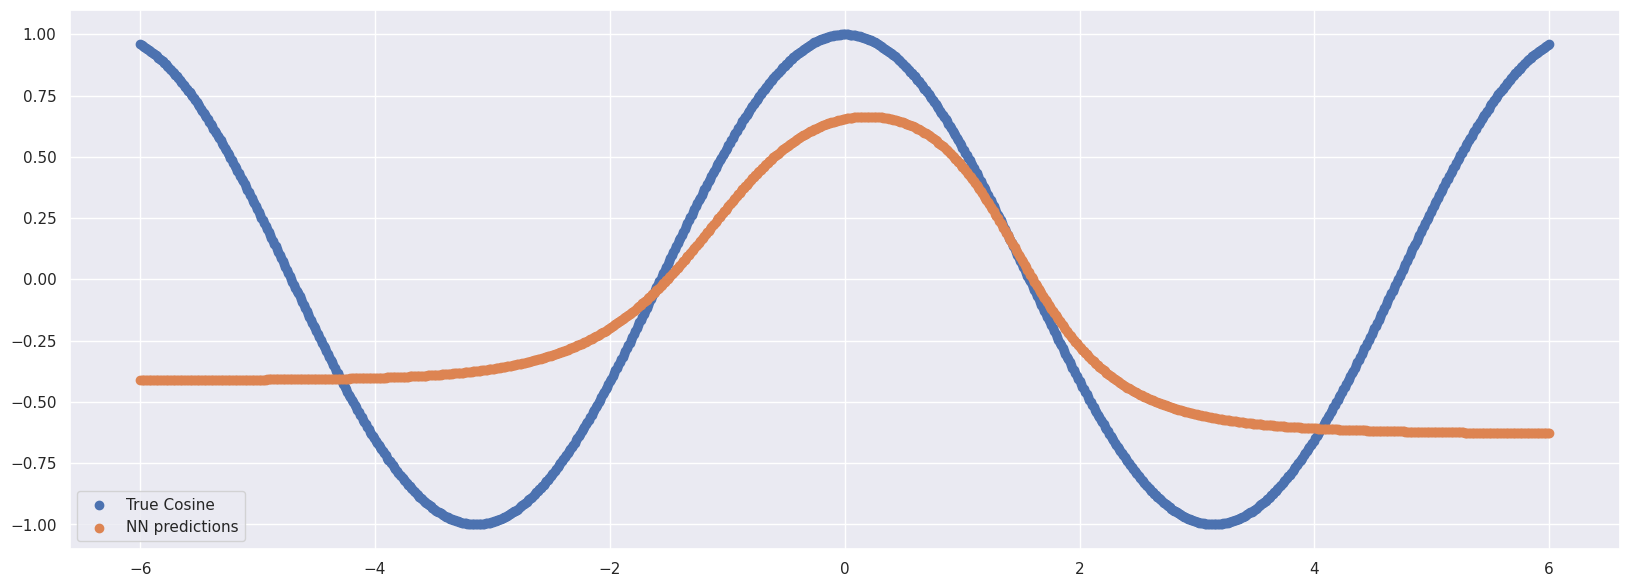

In [ ]:
nn_prediction = NN(X_test.view(-1, 1))
nn_prediction = nn_prediction.detach().numpy()

plt.figure(figsize=(20,7))
plt.scatter(x=X_test, y=Y_test, label='True cosine');  # 'True Cosine'
plt.scatter(x=X_test, y=nn_prediction, label='NN predictions');  # 'NN predictions'
plt.legend()

It has noticeably improved, but clearly requires a few more training iterations.

In [ ]:
NN = train(NN, X, Y, criterion, optimizer, 15)

  0%|          | 0/15 [00:00<?, ?it/s]

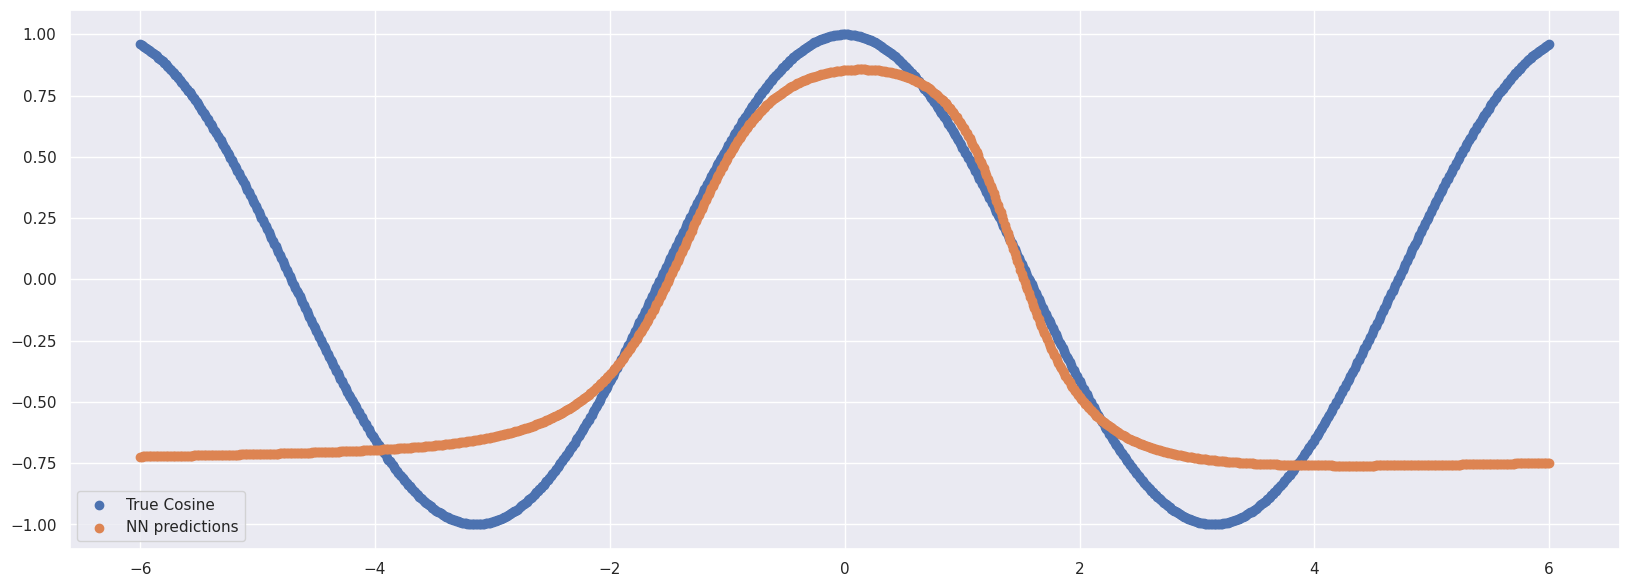

In [ ]:
nn_prediction = NN(X_test.view(-1, 1))
nn_prediction = nn_prediction.detach().numpy()

plt.figure(figsize=(20,7))
plt.scatter(x=X_test, y=Y_test, label='True cosine');
plt.scatter(x=X_test, y=nn_prediction, label='NN predictions');
plt.legend()

One possible way to improve convergence is to reduce the gradient step. Let's lower it to 0.001 and carry out a few more training iterations.

In [ ]:
optimizer = torch.optim.Adam(NN.parameters(), lr=1e-3)

NN = train(NN, X, Y, criterion, optimizer, 50)

  0%|          | 0/50 [00:00<?, ?it/s]

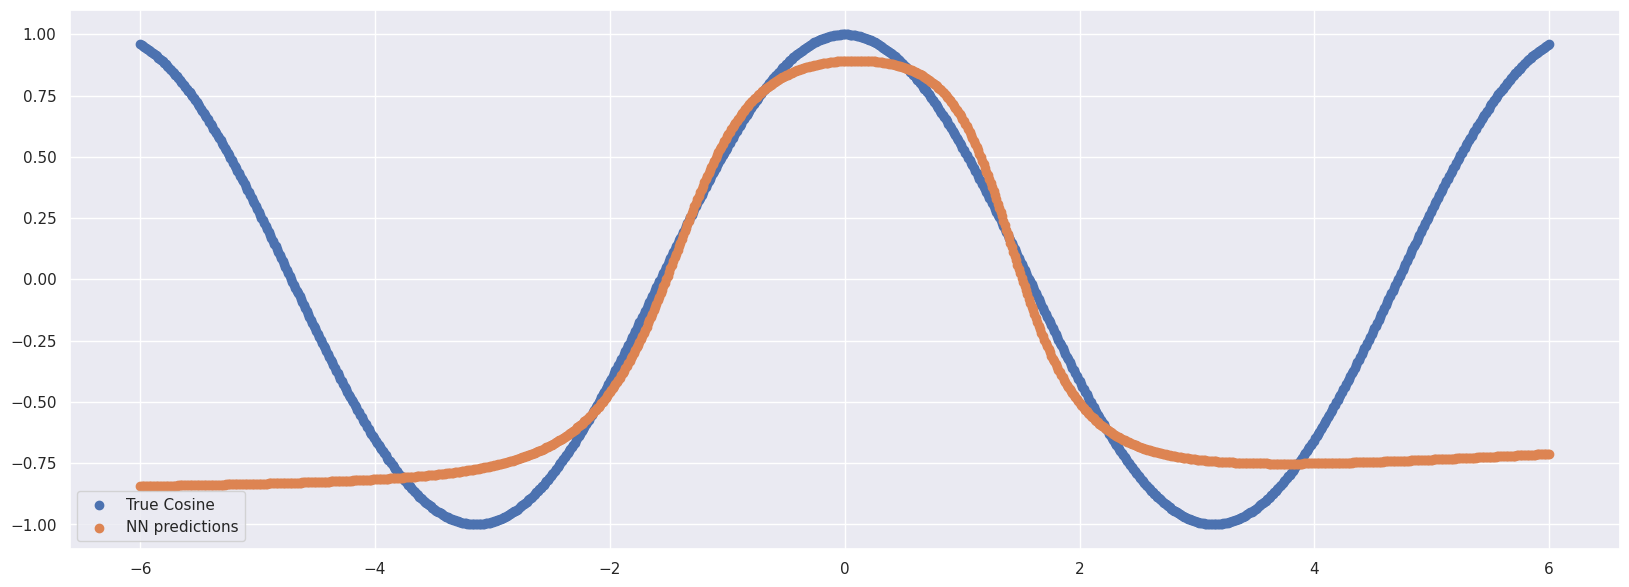

In [ ]:
nn_prediction = NN(X_test.view(-1, 1))
nn_prediction = nn_prediction.detach().numpy()

plt.figure(figsize=(20,7))
plt.scatter(x=X_test, y=Y_test, label='True cosine');
plt.scatter(x=X_test, y=nn_prediction, label='NN presictions');
plt.legend()

The result has become significantly better. Although, we still see imperfections in the approximation at the edges of the graph.






#### Question #2:
Why do you think that happens? Why does our network fit the function around 0 well, and worse towards the edges?

#### Hint
Look at how we created training data

#### Answer
This happens primarily because the coordinates in our original sample are taken from a normal distribution. Therefore, there are very few objects that lie beyond the boundaries of -3 and +3, which means there are few precedents for our neural network to learn from.

You can try to change the distribution of training data (e.g. to uniform) and see how this impacts the training of NN

#### Task #3

In our example above, we used 3 layers and Tanh activation functions. Your task now is to play with the architecture and see how performance changes. Try add/remove layers and change activation functions (e.g. for Sigmoid and ReLU).

Try answer the following questions:
- How many layers are enough for the good performance? How does performance change with different number of layers?
- How does a type of activation function affect the performance? Does network perform well when you use Sigmoid? Also think about if you can change activation function in the last layer. What actually happens if you remove the activation function in the last layer? Did Tanh activation in the last layer help the network produce better results or is it good without this 'help'?
- What is the overall best architecture that you have found? Why do you think it performs best?

Here is also a hint on experimenting: try to change one parameter at time. When you change the parameter, retrain the network and see how the behaviour has changes. Log the results, so you can then a general picture of how each parameter influences the model training. This will also help you not to forget what you have already tried.

In [ ]:
# YOUR CODE HERE, make experiments, log your results, make conclusions

## Inheritance from the nn.Module class

Let's take another look at how we defined our neural network:

In [ ]:
NN = nn.Sequential(nn.Linear(1, 5, bias=True),
                   nn.Tanh(),
                   nn.Linear(5, 5, bias=True),
                   nn.Tanh(),
                   nn.Linear(5, 1, bias=True),
                   nn.Tanh())

Sometimes a simple structure like `Sequential` is not enough to create sufficiently complex models. This is sometimes related to the need to create several independent branches in the computations, and sometimes it has to do with the necessity of logging the history of computations. There may be other reasons as well. In any case, it would be nice to have the ability to intervene in the results of intermediate computations. For this, there is a more flexible way to work with neural networks in Pytorch - writing custom classes that inherit from the `nn.Module` class.

The description of the forward pass through such a block occurs in the form of the `forward` function specification.

In [ ]:
class Net(nn.Module):
    def __init__(self, dim=1):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(dim, 5)
        self.tanh1 = nn.Tanh()

        self.fc2 = nn.Linear(5, 5)
        self.tanh2 = nn.Tanh()

        self.fc3 = nn.Linear(5, 1)
        self.tanh3 = nn.Tanh()


    def forward(self, x):

        x = self.fc1(x)
        x = self.tanh1(x)

        x = self.fc2(x)
        x = self.tanh2(x)

        x = self.fc3(x)
        x = self.tanh3(x)
        return x

In [ ]:
NN = Net(1)

Train such a model in exactly the same way - using the `train` function we already have.

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(NN.parameters(), lr=1e-2)

NN = train(NN, X, Y, criterion, optimizer, 100)

  0%|          | 0/100 [00:00<?, ?it/s]

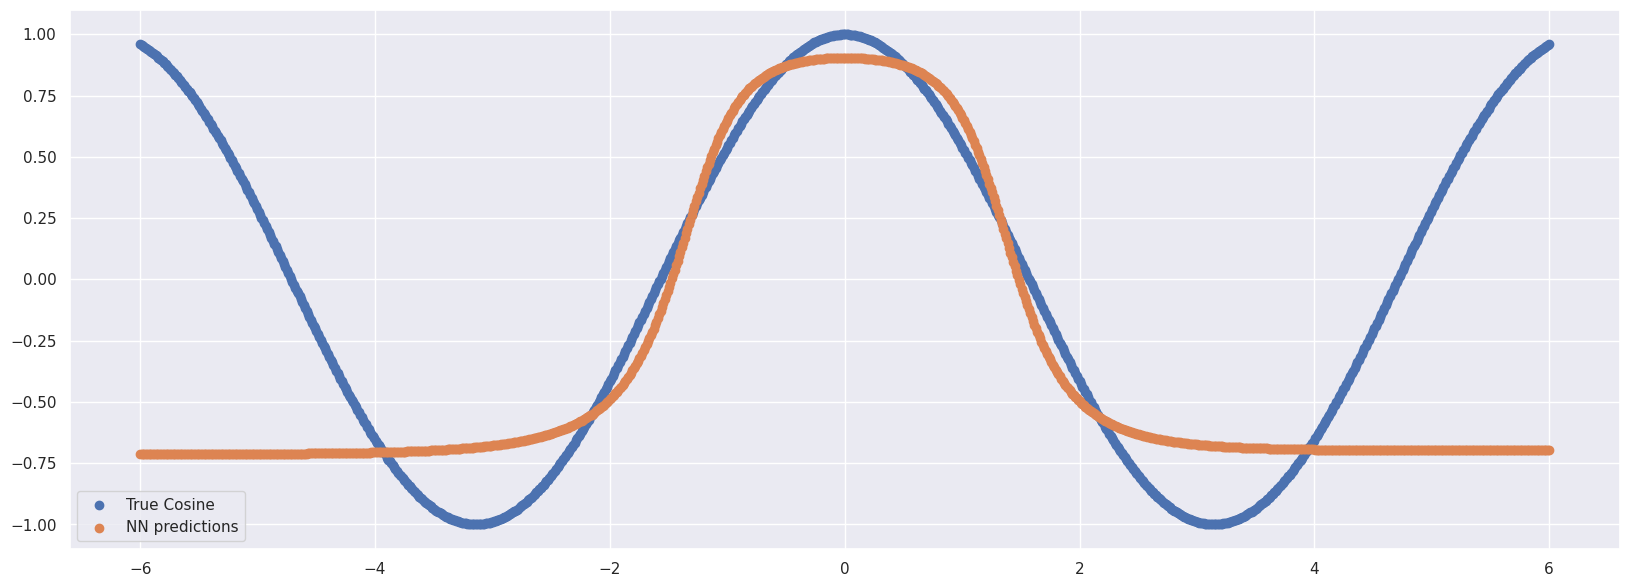

In [ ]:
nn_prediction = NN(X_test.view(-1, 1))
nn_prediction = nn_prediction.detach().numpy()

plt.figure(figsize=(20,7))
plt.scatter(x=X_test, y=Y_test, label='True cosine');
plt.scatter(x=X_test, y=nn_prediction, label='NN predictions');
plt.legend()

Inheriting from the `nn.Module` class allows us to implement compatibility of our model with the `Pytorch` interface, as well as to use some additional features. For example, we can access the model parameters in matrix form:

In [ ]:
for param in NN.parameters():
    print('parameter shape: ', param.shape)

#### Task #4

Take your best network from task #3 and re-write it using class. Train and test it on the data. Does it produce the same results?

In [ ]:
# YOUR CODE HERE, re-write your network using class notation

## Transferring Computations to the Graphics Card

Using graphic cores is a mandatory attribute of working with deep neural networks. Graphic cores allow for fast and efficient parallel computations. In `Pytorch`, an interface for transferring computations to the graphics card has been implemented. To carry out this transfer, both the model parameters and the input data need to be moved to the graphics card.

First of all, you need to check whether the graphics card is available for computations. In Google Colab, for this purpose, you need to select the "Runtime" tab in the main menu, then select the "Change runtime type" command, and afterwards choose "GPU" as the hardware accelerator. After that, you can use the following command to check the availability of the GPU:

In [ ]:
import torch
# this command checks whether the GPU is available
torch.cuda.is_available()

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Now we can perform computations on the GPU. Tensors and modules are transferred to the GPU using the `.to(device)` or `.cuda()` functions.

**Note:** We are forced to duplicate the definitions of the main functions, as the runtime environment is reset after connecting the hardware accelerator.

In [ ]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, dim):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(dim, 5)
        self.tanh1 = nn.Tanh()

        self.fc2 = nn.Linear(5, 5)
        self.tanh2 = nn.Tanh()

        self.fc3 = nn.Linear(5, 1)
        self.tanh3 = nn.Tanh()


    def forward(self, x):

        x = self.fc1(x)
        x = self.tanh1(x)

        x = self.fc2(x)
        x = self.tanh2(x)

        x = self.fc3(x)
        x = self.tanh3(x)
        return x

In [ ]:
NN = Net(1)
NN = NN.to(device) #for transferring to device

In [ ]:
NN

In [ ]:
import tqdm
from tqdm.auto import tqdm

def train(model, X, y, criterion, optimizer, num_epoch):
    '''
    args:
        model - neural network model
        X and y - training dataset
        criterion - loss function taken from the `torch.nn` module
        optimizer - optimizer taken from the `torch.optim` module
        num_epoch - number of training epochs, i.e., the number of gradient steps
                    that will be performed for each object in the dataset
    '''
    # loop over the number of training epochs
    for t in tqdm(range(num_epoch)):
        # Calculate the predictions of our model
        y_pred = model(X.to(device))

        # Calculate the value of the loss function on the obtained predictions
        loss = criterion(y_pred, y.to(device))

        # Reset the previously computed gradient values
        optimizer.zero_grad()
        # Compute new gradients
        loss.backward()
        # Perform a gradient descent step
        optimizer.step()

    return model

Again, we will set up the data for the cosine:

In [ ]:
X = torch.normal(mean=torch.zeros((1000, 1)), std= 2)
Y = torch.cos(X)

Train the neural network on GPU

In [ ]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(NN.parameters(), lr=1e-2)

NN = train(NN, X, Y, criterion, optimizer, 50)

Now, to convert the tensor to the tgthz format using the command `.detach().numpy()`, we need to add one more command - `.cpu()`

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

X_test = torch.linspace(-6, 6, 1000).to(device)
Y_test = torch.cos(X_test)

nn_prediction = NN(X_test.view(-1, 1))
nn_prediction = nn_prediction.cpu().detach().numpy()

plt.figure(figsize=(20,7))
plt.scatter(x=X_test.cpu(), y=Y_test.cpu(), label='True cosine');
plt.scatter(x=X_test.cpu(), y=nn_prediction, label='NN predictions');
plt.legend()

## Additional Materials

### Useful Links

Here are all the links that were for the first class:

- "[Creating a Neural Network](https://www.litres.ru/book/tarik-rashid/sozdaem-neyronnuu-set-54815634/)" (Tarik Rashid) — a book where the structure of a fully connected neural network and the principle of its training are excellently explained in the first chapters.
- If you struggle with understanding fradient descent algorithm, these Colab notebooks might help:
    - [a primer on derivatives](https://colab.research.google.com/drive/1Etz36ELaIoqOoDR_gbLVn3HsMfxtbK2Q?usp=sharing) 
    - [a primer on gradient optimization](https://colab.research.google.com/drive/1I73AiHtN0XvXCgCMj1oLKZTNw4CRDdTL?usp=sharing)
- [A Neural Network Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.85255&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) — here you can build simple fully-connected neural networks using UI, train them on toy tasks and visualize decision boundaries

And a couple of links on different optimizers:

- [Optimizers, their principles of operation and nuances](https://habr.com/ru/companies/skillfactory/articles/552394/);
- [Various optimizers](https://www.youtube.com/watch?v=lRWiWwS11Yo)